In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [4]:
df = pd.read_csv('startup_data.csv')
df.head()

,Unnamed: 0,state_code,latitude,longitude,zip_code,id,city,Unnamed: 6,name,labels,...,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
0,1005,CA,42.358880,-71.056820,92101,c:6669,San Diego,NaN,Bandsintown,1,...,c:6669,0,1,0,0,0,0,1.0000,0,acquired
1,204,CA,37.238916,-121.973718,95032,c:16283,Los Gatos,NaN,TriCipher,1,...,c:16283,1,0,0,1,1,1,4.7500,1,acquired
2,1001,CA,32.901049,-117.192656,92121,c:65620,San Diego,San Diego CA 92121,Plixi,1,...,c:65620,0,0,1,0,0,0,4.0000,1,acquired
3,738,CA,37.320309,-122.050040,95014,c:42668,Cupertino,Cupertino CA 95014,Solidcore Systems,1,...,c:42668,0,0,0,1,1,1,3.3333,1,acquired
4,1002,CA,37.779281,-122.419236,94105,c:65806,San Francisco,San Francisco CA 94105,Inhale Digital,0,...,c:65806,1,1,0,0,0,0,1.0000,1,closed


In [5]:
df.info()
df.describe()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 923 entries, 0 to 922
Data columns (total 49 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                923 non-null    int64  
 1   state_code                923 non-null    object 
 2   latitude                  923 non-null    float64
 3   longitude                 923 non-null    float64
 4   zip_code                  923 non-null    object 
 5   id                        923 non-null    object 
 6   city                      923 non-null    object 
 7   Unnamed: 6                430 non-null    object 
 8   name                      923 non-null    object 
 9   labels                    923 non-null    int64  
 10  founded_at                923 non-null    object 
 11  closed_at                 335 non-null    object 
 12  first_funding_at          923 non-null    object 
 13  last_funding_at           923 non-null    object 
 14  age_first_

,0
Unnamed: 0,0
state_code,0
latitude,0
longitude,0
zip_code,0
id,0
city,0
Unnamed: 6,493
name,0
labels,0


In [7]:
selected_columns = [
    'funding_total_usd',
    'funding_rounds',
    'milestones',
    'relationships',
    'avg_participants',
    'has_VC', 'has_angel',
    'has_roundA', 'has_roundB', 'has_roundC', 'has_roundD',
    'is_CA', 'is_NY', 'is_MA', 'is_TX', 'is_otherstate',
    'is_software', 'is_web', 'is_mobile', 'is_enterprise', 'is_ecommerce',
    'category_code',
    'status'  # Target
]

df = df[selected_columns].copy()


In [8]:
df = df.dropna()


In [9]:
df['status'] = df['status'].apply(lambda x: 1 if x == 'operating' else 0)

In [10]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['category_code'] = le.fit_transform(df['category_code'])

this is where we will start the train test split and scale the results

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df.drop('status', axis=1)
y = df['status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [13]:
print("Class distribution in full data:")
print(df['status'].value_counts())

Class distribution in full data:
status
0    923
Name: count, dtype: int64


In [15]:
df_raw = pd.read_csv('startup_data.csv')

In [16]:
print(df_raw['status'].value_counts())

status
acquired    597
closed      326
Name: count, dtype: int64


In [17]:
df = df_raw[df_raw['status'].isin(['acquired', 'closed'])].copy()
df['status'] = df['status'].map({'acquired': 1, 'closed': 0})

in the above code i have redefined labels, considering acquired as success and closed as fail.

In [18]:
print(df['status'].value_counts())

status
1    597
0    326
Name: count, dtype: int64


In [19]:
selected_columns = [
    'funding_total_usd', 'funding_rounds', 'milestones', 'relationships',
    'avg_participants',
    'has_VC', 'has_angel', 'has_roundA', 'has_roundB', 'has_roundC', 'has_roundD',
    'is_CA', 'is_NY', 'is_MA', 'is_TX', 'is_otherstate',
    'is_software', 'is_web', 'is_mobile', 'is_enterprise', 'is_ecommerce',
    'category_code',  # categorical
    'status'
]

df = df[selected_columns].dropna()

In [20]:
le = LabelEncoder()
df['category_code'] = le.fit_transform(df['category_code'])

In [21]:
X = df.drop('status', axis=1)
y = df['status']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [22]:
lr = LogisticRegression(max_iter=1000, class_weight='balanced')
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

print("Logistic Regression Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))


Logistic Regression Results:
Accuracy: 0.6810810810810811
              precision    recall  f1-score   support

           0       0.53      0.77      0.63        65
           1       0.84      0.63      0.72       120

    accuracy                           0.68       185
   macro avg       0.68      0.70      0.67       185
weighted avg       0.73      0.68      0.69       185



here are the first results showcasing the LR results

In [23]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("Random Forest Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

Random Forest Results:
Accuracy: 0.7567567567567568
              precision    recall  f1-score   support

           0       0.68      0.58      0.63        65
           1       0.79      0.85      0.82       120

    accuracy                           0.76       185
   macro avg       0.73      0.72      0.72       185
weighted avg       0.75      0.76      0.75       185



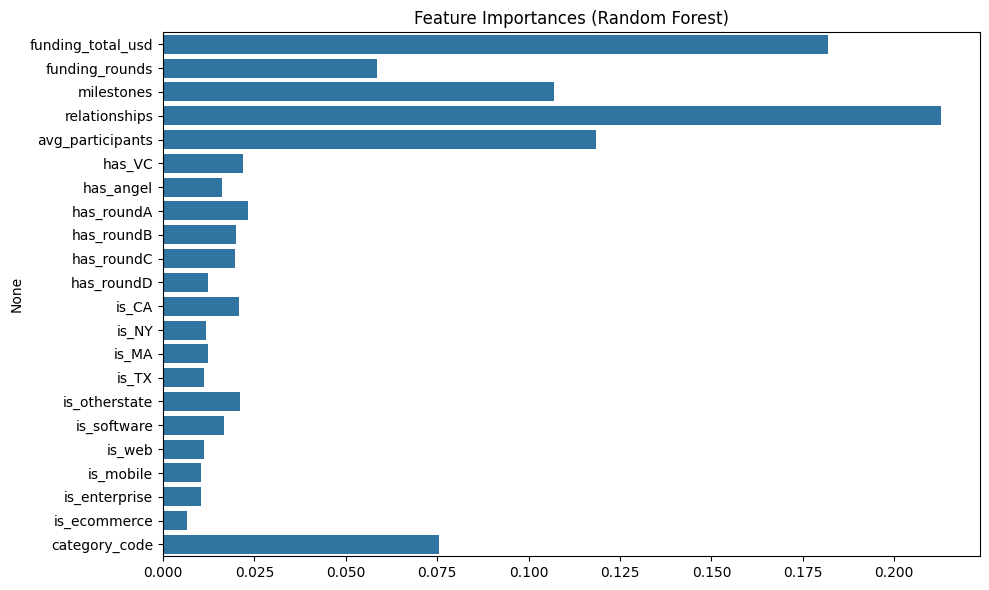

In [25]:
importances = rf.feature_importances_
feature_names = X.columns

plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=feature_names)
plt.title("Feature Importances (Random Forest)")
plt.tight_layout()
plt.show()

**Conclusion**: Top contributors were the *number of founder relationships, total funding raised, and average investor participation*.

These features suggest that both financial strength and strong networks are key drivers of acquisition.